## Introduction

## Importing Libraries and Loading Images

### Libraries

In [52]:
#Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
from sklearn.model_selection import train_test_split
import keras
from keras import models
from keras import layers
from keras import optimizers
from keras.layers import Dense, Conv2D, Flatten
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import to_categorical
import os

### Load Images

In [2]:
#Directory path
train_data_dir = 'chest_xray/train/'
test_data_dir = 'chest_xray/test/'
val_data_dir = 'chest_xray/val/'

In [3]:
#Get all the data in each generator and reshaping the images
train_generator = ImageDataGenerator(rescale = 1./255).flow_from_directory(
        train_data_dir, 
        target_size=(128, 128), 
        color_mode = 'grayscale', 
        batch_size=500)

test_generator = ImageDataGenerator(rescale = 1./255).flow_from_directory(
        test_data_dir, 
        target_size=(128, 128), 
        color_mode = 'grayscale', 
        batch_size=200)

val_generator = ImageDataGenerator(rescale = 1./255).flow_from_directory(
        val_data_dir, 
        target_size=(128, 128), 
        color_mode = 'grayscale',
        batch_size=16)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [4]:
#Create the datasets
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
val_images, val_labels = next(val_generator)

### Previewing Images

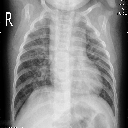

In [5]:
array_to_img(train_images[10])

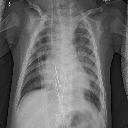

In [6]:
array_to_img(train_images[22])

## Images and Labels

### EDA of the Dataset

In [7]:
#exploring the data set
train_ex = train_images.shape[0]
num_px = train_images.shape[1]
test_ex = test_images.shape[0]
val_ex = val_images.shape[0]

print ("Number of training samples: " + str(train_ex))
print ("Number of testing samples: " + str(test_ex))
print ("Number of validation samples: " + str(val_ex))
print ("train_images shape: " + str(train_images.shape))
print ("train_labels shape: " + str(train_labels.shape))
print ("test_images shape: " + str(test_images.shape))
print ("test_labels shape: " + str(test_labels.shape))
print ("val_images shape: " + str(val_images.shape))
print ("val_labels shape: " + str(val_labels.shape))

Number of training samples: 500
Number of testing samples: 200
Number of validation samples: 16
train_images shape: (500, 128, 128, 1)
train_labels shape: (500, 2)
test_images shape: (200, 128, 128, 1)
test_labels shape: (200, 2)
val_images shape: (16, 128, 128, 1)
val_labels shape: (16, 2)


### Images

In [8]:
#Reshaping the images
train_img = train_images.reshape(train_images.shape[0], -1)
test_img = test_images.reshape(test_images.shape[0], -1)
val_img = val_images.reshape(val_images.shape[0], -1)

In [9]:
#Previewing the shape of images
print('Train Images:',np.shape(train_img))
print('Test Images:',np.shape(test_img))
print('Validation Images:',np.shape(val_img))

Train Images: (500, 16384)
Test Images: (200, 16384)
Validation Images: (16, 16384)


### Labels

In [10]:
train_labels

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.

In [11]:
train_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [12]:
train_label = np.reshape(train_labels[:, 0], (500,1))
test_label = np.reshape(test_labels[:, 0], (200,1))
val_label = np.reshape(val_labels[:, 0], (16,1))

In [13]:
print('Train Labels:',np.shape(train_label))
print('Test Labels:',np.shape(test_label))
print('Validation Labels:',np.shape(val_label))

Train Labels: (500, 1)
Test Labels: (200, 1)
Validation Labels: (16, 1)


## Baseline Model

### Model

In [14]:
# Build a baseline fully connected model
np.random.seed(42)
model = models.Sequential()
model.add(layers.Dense(8, activation='relu', input_shape=(16384, )))
model.add(layers.Dense(1, activation='sigmoid'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 131080    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 131,089
Trainable params: 131,089
Non-trainable params: 0
_________________________________________________________________


In [16]:
#Creating a Compile
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [17]:
#Creating history variable
history_bl = model.fit(train_img,
                    train_label,
                    epochs=100,
                    batch_size=80,
                    validation_data=(val_img, val_label))

Epoch 1/100
7/7 [==============================] - 0s 19ms/step - loss: 0.7639 - accuracy: 0.6540 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/100
7/7 [==============================] - 0s 6ms/step - loss: 0.6883 - accuracy: 0.7400 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 3/100
7/7 [==============================] - 0s 7ms/step - loss: 0.6845 - accuracy: 0.7400 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 4/100
7/7 [==============================] - 0s 7ms/step - loss: 0.6808 - accuracy: 0.7400 - val_loss: 0.6937 - val_accuracy: 0.5000
Epoch 5/100
7/7 [==============================] - 0s 7ms/step - loss: 0.6770 - accuracy: 0.7400 - val_loss: 0.6939 - val_accuracy: 0.5000
Epoch 6/100
7/7 [==============================] - 0s 7ms/step - loss: 0.6735 - accuracy: 0.7400 - val_loss: 0.6943 - val_accuracy: 0.5000
Epoch 7/100
7/7 [==============================] - 0s 6ms/step - loss: 0.6701 - accuracy: 0.7400 - val_loss: 0.6947 - val_accuracy: 0.5000
Epoch 8/100
7/7 [=========

7/7 [==============================] - 0s 4ms/step - loss: 0.5909 - accuracy: 0.7400 - val_loss: 0.7420 - val_accuracy: 0.5000
Epoch 60/100
7/7 [==============================] - 0s 4ms/step - loss: 0.5904 - accuracy: 0.7400 - val_loss: 0.7429 - val_accuracy: 0.5000
Epoch 61/100
7/7 [==============================] - 0s 4ms/step - loss: 0.5899 - accuracy: 0.7400 - val_loss: 0.7438 - val_accuracy: 0.5000
Epoch 62/100
7/7 [==============================] - 0s 4ms/step - loss: 0.5894 - accuracy: 0.7400 - val_loss: 0.7446 - val_accuracy: 0.5000
Epoch 63/100
7/7 [==============================] - 0s 4ms/step - loss: 0.5890 - accuracy: 0.7400 - val_loss: 0.7456 - val_accuracy: 0.5000
Epoch 64/100
7/7 [==============================] - 0s 4ms/step - loss: 0.5885 - accuracy: 0.7400 - val_loss: 0.7466 - val_accuracy: 0.5000
Epoch 65/100
7/7 [==============================] - 0s 4ms/step - loss: 0.5880 - accuracy: 0.7400 - val_loss: 0.7476 - val_accuracy: 0.5000
Epoch 66/100
7/7 [===============

### Results

In [18]:
def model_results(tr_img, tr_lab, te_img, te_lab):
    result_train = model.evaluate(tr_img, tr_lab)
    results_test = model.evaluate(te_img, te_lab)
    print(result_train)
    print(results_test)

In [19]:
def model_graphs(hist):
    acc = hist.history['accuracy']
    val_acc = hist.history['val_accuracy']
    loss = hist.history['loss']
    val_loss = hist.history['val_loss']
    epochs = range(len(acc))
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.figure()
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

In [20]:
model_results(train_img, train_label, test_img, test_label)

7/7 [==============================] - 0s 1ms/step - loss: 0.6609 - accuracy: 0.6050
[0.5508461594581604, 0.7400000095367432]
[0.660881519317627, 0.6050000190734863]


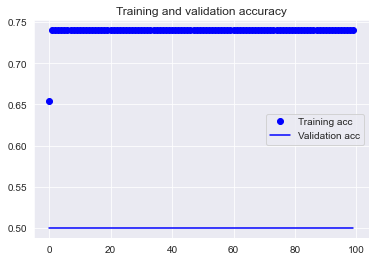

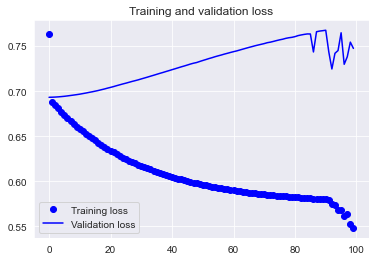

In [21]:
model_graphs(history_bl)

In [22]:
model.save('Chest_X-ray_baseline.h5')

## CNN

### Datagenerator

In [23]:
#Get all of the data into each generator and modify the images
train_regen = ImageDataGenerator(rescale=1./255)
test_regen = ImageDataGenerator(rescale=1./255)
val_regen = ImageDataGenerator(rescale=1./255)

In [24]:
train_generator = train_regen.flow_from_directory(train_data_dir,
                                                  target_size = (128, 128),
                                                  batch_size = 64,
                                                  color_mode = 'grayscale',
                                                  class_mode = 'binary')
                                                  
test_generator = test_regen.flow_from_directory(test_data_dir,
                                                target_size = (128, 128),
                                                batch_size = 6,
                                                color_mode = 'grayscale',
                                                class_mode = 'binary')

val_generator = val_regen.flow_from_directory(val_data_dir,
                                              target_size = (128, 128),
                                              batch_size = 4,
                                              color_mode = 'grayscale',
                                              class_mode = 'binary')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [25]:
X_train, y_train = next(train_generator)
X_test, y_test = next(test_generator)
X_val, y_val = next(val_generator)

### Model

In [26]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(128, 128, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 25088)            

In [28]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

In [29]:
history_cnn = model.fit(train_generator, 
                    epochs = 40, 
                    validation_data=val_generator)

Epoch 1/40
82/82 [==============================] - 64s 786ms/step - loss: 0.4072 - accuracy: 0.8278 - val_loss: 0.5145 - val_accuracy: 0.6875
Epoch 2/40
82/82 [==============================] - 65s 794ms/step - loss: 0.1962 - accuracy: 0.9279 - val_loss: 0.4202 - val_accuracy: 0.7500
Epoch 3/40
82/82 [==============================] - 68s 832ms/step - loss: 0.1395 - accuracy: 0.9500 - val_loss: 0.7045 - val_accuracy: 0.6875
Epoch 4/40
82/82 [==============================] - 66s 800ms/step - loss: 0.1176 - accuracy: 0.9571 - val_loss: 0.3931 - val_accuracy: 0.7500
Epoch 5/40
82/82 [==============================] - 65s 795ms/step - loss: 0.1028 - accuracy: 0.9603 - val_loss: 0.5691 - val_accuracy: 0.6875
Epoch 6/40
82/82 [==============================] - 65s 790ms/step - loss: 0.0932 - accuracy: 0.9651 - val_loss: 0.2731 - val_accuracy: 0.9375
Epoch 7/40
82/82 [==============================] - 65s 791ms/step - loss: 0.0842 - accuracy: 0.9672 - val_loss: 0.4172 - val_accuracy: 0.7500

### Results

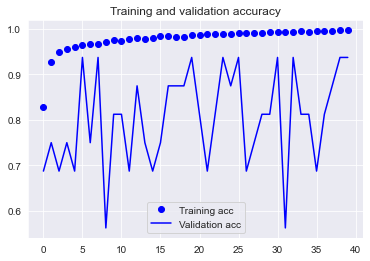

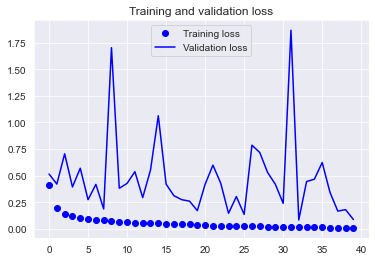

In [30]:
model_graphs(history_cnn)

In [31]:
model.save('Chest_X-ray_cnn.h5')

## CNN Weighted

### Class Imbalance

>Quick EDAs to see the severity of class imbalance

In [32]:
import warnings
warnings.filterwarnings("ignore")

In [33]:
train_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [34]:
def imbalance_graphs(data_list):
    
    empty = []
    
    for i in data_list:
        if(i[1] == 0):
            empty.append("NORMAL")
        else:
            empty.append("PNEUMONIA")
    sns.countplot(empty);     

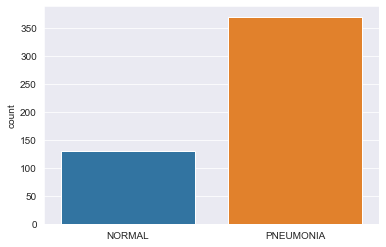

In [35]:
imbalance_graphs(train_labels)

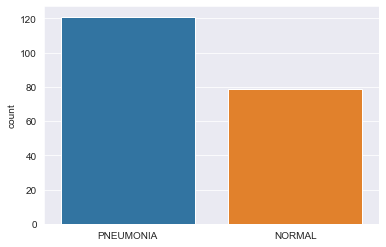

In [36]:
imbalance_graphs(test_labels)

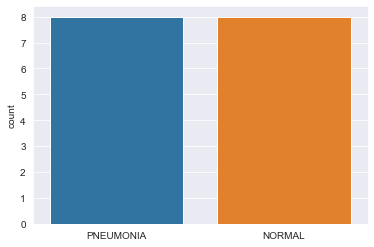

In [37]:
imbalance_graphs(val_labels)

### Model

In [38]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(128, 128, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [39]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 126, 126, 32)      320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)            

In [40]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

In [41]:
history_cnn_w = model.fit(train_generator, 
                    epochs = 40,
                    class_weight = {0: 3., 1: 1.},
                    validation_data=val_generator)

Epoch 1/40
82/82 [==============================] - 65s 797ms/step - loss: 0.7283 - accuracy: 0.7431 - val_loss: 0.5136 - val_accuracy: 0.7500
Epoch 2/40
82/82 [==============================] - 66s 800ms/step - loss: 0.3647 - accuracy: 0.9091 - val_loss: 0.3295 - val_accuracy: 0.8750
Epoch 3/40
82/82 [==============================] - 66s 804ms/step - loss: 0.2464 - accuracy: 0.9379 - val_loss: 0.3412 - val_accuracy: 0.8125
Epoch 4/40
82/82 [==============================] - 65s 795ms/step - loss: 0.1930 - accuracy: 0.9475 - val_loss: 0.3552 - val_accuracy: 0.8125
Epoch 5/40
82/82 [==============================] - 65s 793ms/step - loss: 0.1743 - accuracy: 0.9528 - val_loss: 0.1783 - val_accuracy: 0.8750
Epoch 6/40
82/82 [==============================] - 67s 816ms/step - loss: 0.1501 - accuracy: 0.9611 - val_loss: 0.4148 - val_accuracy: 0.6875
Epoch 7/40
82/82 [==============================] - 65s 797ms/step - loss: 0.1361 - accuracy: 0.9647 - val_loss: 0.3425 - val_accuracy: 0.8750

### Results

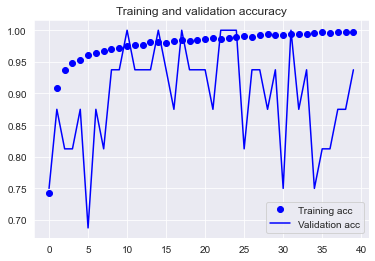

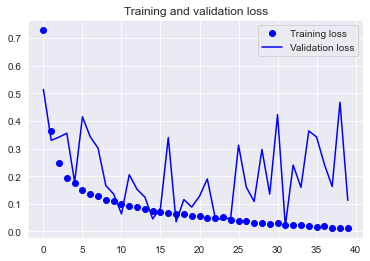

In [42]:
model_graphs(history_cnn_w)

In [43]:
model.save('Chest_X-ray_weighted_cnn.h5')

## CNN Final Model

### GridSearch

In [60]:
# function for displaying grid search results if we 
# wanted to do it on other models we could just use this
def display_cv_results(search_results):
    print('Best score = {:.4f} using {}'.format(search_results.best_score_, search_results.best_params_))
    means = search_results.cv_results_['mean_test_score']
    stds = search_results.cv_results_['std_test_score']
    params = search_results.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print('mean test accuracy +/- std = {:.4f} +/- {:.4f} with: {}'.format(mean, stdev, param))

In [54]:
#function for an easy to use cnn model to create for grid search 
def cnn_model(pool_type='max', conv_activation='sigmoid', dropout_rate=0.10):
    model = models.Sequential()

    model.add(layers.Conv2D(32, (3, 3), activation='relu',
                            input_shape=(128, 128, 1)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])
    return (model)
#makes cnn equal to the model 
cnn = cnn_model()
cnn.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 126, 126, 32)      320       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 14, 14, 128)       0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 25088)            

In [55]:
#makes our model from the funtion 
model = KerasClassifier(build_fn=cnn_model, verbose=1)

In [69]:
#peramters for grid search of or model to go through 
#these can al;l be changed and modified depending 
param_grid = {
    'pool_type': ['max', 'average'],
    'conv_activation': ['sigmoid', 'tanh'],    
    'epochs': [10 , 7],
}

In [70]:
#i dont know why it only does 2 steps per epoch 
#does the grid search for our model 
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

Epoch 1/10
2/2 [==============================] - 0s 140ms/step - loss: 0.7250 - accuracy: 0.6406
Epoch 2/10
2/2 [==============================] - 0s 150ms/step - loss: 0.7088 - accuracy: 0.6562
Epoch 3/10
2/2 [==============================] - 0s 149ms/step - loss: 0.6639 - accuracy: 0.7500
Epoch 4/10
2/2 [==============================] - 0s 152ms/step - loss: 0.6299 - accuracy: 0.6406
Epoch 5/10
2/2 [==============================] - 0s 154ms/step - loss: 0.6217 - accuracy: 0.7031
Epoch 6/10
2/2 [==============================] - 0s 150ms/step - loss: 0.6102 - accuracy: 0.6406
Epoch 7/10
2/2 [==============================] - 0s 154ms/step - loss: 0.7028 - accuracy: 0.3906
Epoch 8/10
2/2 [==============================] - 0s 153ms/step - loss: 0.5876 - accuracy: 0.6406
Epoch 9/10
2/2 [==============================] - 0s 156ms/step - loss: 0.5563 - accuracy: 0.6719
Epoch 10/10
2/2 [==============================] - 0s 157ms/step - loss: 0.5263 - accuracy: 0.6875


In [71]:
#displays the best peramets found by the grid seach 
display_cv_results(grid_result)

Best score = 0.7951 using {'conv_activation': 'sigmoid', 'epochs': 10, 'pool_type': 'max'}
mean test accuracy +/- std = 0.7951 +/- 0.1582 with: {'conv_activation': 'sigmoid', 'epochs': 10, 'pool_type': 'max'}
mean test accuracy +/- std = 0.7338 +/- 0.1199 with: {'conv_activation': 'sigmoid', 'epochs': 10, 'pool_type': 'average'}
mean test accuracy +/- std = 0.7944 +/- 0.1626 with: {'conv_activation': 'sigmoid', 'epochs': 7, 'pool_type': 'max'}
mean test accuracy +/- std = 0.7042 +/- 0.0517 with: {'conv_activation': 'sigmoid', 'epochs': 7, 'pool_type': 'average'}
mean test accuracy +/- std = 0.6407 +/- 0.0584 with: {'conv_activation': 'tanh', 'epochs': 10, 'pool_type': 'max'}
mean test accuracy +/- std = 0.7468 +/- 0.1581 with: {'conv_activation': 'tanh', 'epochs': 10, 'pool_type': 'average'}
mean test accuracy +/- std = 0.5758 +/- 0.1220 with: {'conv_activation': 'tanh', 'epochs': 7, 'pool_type': 'max'}
mean test accuracy +/- std = 0.6407 +/- 0.0584 with: {'conv_activation': 'tanh', 'e

### Model

### Results

## Conclusion 

## Play Testing

#### *Augmentation Generator Dataset (Unused)

Both the train set and test has a severe class imbalance so we will need to preform some data augmentation to create more normal images to match the number of pneumonia images. Whereas the validation set is equal so it will not need any adjustment.

In [41]:
# train_aug_gen = ImageDataGenerator(rescale=1./255, 
#                                    rotation_range=30, 
#                                    width_shift_range=0.3, 
#                                    height_shift_range=0.2, 
#                                    zoom_range=0.2, 
#                                    vertical_flip=True)

In [42]:
# test_aug_gen = ImageDataGenerator(rescale=1./255, 
#                                    rotation_range=30, 
#                                    width_shift_range=0.3, 
#                                    height_shift_range=0.2,  
#                                    zoom_range=0.2, 
#                                    vertical_flip=True)

In [43]:
# #Get all the data in each generator and reshaping the images
# train_generator = train_aug_gen.flow_from_directory(
#         train_data_dir, 
#         target_size=(128, 128), 
#         color_mode = 'grayscale', 
#         batch_size=500)

# test_generator = test_aug_gen.flow_from_directory(
#         test_data_dir, 
#         target_size=(128, 128), 
#         color_mode = 'grayscale', 
#         batch_size=6)

# val_generator = ImageDataGenerator(rescale = 1./255).flow_from_directory(
#         val_data_dir, 
#         target_size=(128, 128), 
#         color_mode = 'grayscale',
#         batch_size=4)

In [44]:
# train_images, train_labels = next(train_generator)
# test_images, test_labels = next(test_generator)
# val_images, val_labels = next(val_generator)

In [45]:
# imbalance_graphs(train_labels)

In [46]:
# imbalance_graphs(test_labels)

#### Model

In [47]:
# model = models.Sequential()
# model.add(layers.Conv2D(32, (3, 3), activation='relu',
#                         input_shape=(128, 128,  1)))
# model.add(layers.MaxPooling2D((2, 2)))

# model.add(layers.Conv2D(32, (4, 4), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))

# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))

# model.add(layers.Flatten())
# model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dense(1, activation='sigmoid'))

# model.compile(loss='binary_crossentropy',
#               optimizer= 'sgd',
#               metrics=['accuracy'])

In [48]:
# model.summary()

In [49]:
# history_da = model.fit(test_generator,
#                     epochs= 50, 
#                     class_weight = {0: 2., 1: 1.},
#                     validation_data=val_generator) 

#### Results

In [50]:
# model_results(X_train, y_train, X_test, y_test)

In [51]:
# model_graphs(history_da)